# Injected signal onto Gaussian noise \& Testing waveforms
Throuth the notebook we use the ```igwn-py310``` conda environment.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import matplotlib 
%config InlineBackend.figure_format = 'retina'
matplotlib.rcParams['figure.figsize'] = (8.08, 5.)
matplotlib.rcParams['xtick.labelsize'] = 20.0
matplotlib.rcParams['ytick.labelsize'] = 20.0
matplotlib.rcParams['axes.labelsize'] = 26.0
matplotlib.rcParams['legend.fontsize'] = 13
matplotlib.rcParams['font.family']= 'Times New Roman'
matplotlib.rcParams['font.sans-serif']= ['Bitstream Vera Sans']
matplotlib.rcParams['text.usetex']= True
matplotlib.rcParams['mathtext.fontset']= 'stixsans'

import matplotlib.mlab as mlab
# pycbc important modules
from pycbc.waveform import get_td_waveform, get_fd_waveform
from pycbc.detector import Detector

Comparing different ```delta_f```

In [2]:
# sample rate etc
sampling_rate=2048
Tobs=2
delta_f = 1/Tobs
delta_t=1/sampling_rate

align_pars = {
    "approximant":'IMRPhenomPv2',
    "mass1":37,
    "mass2":32,
    "spin1z":0,
    "spin2z":0,
    "inclination":2.5,
    "coa_phase":1.5,
    "delta_t":delta_t,
    "delta_f":delta_f,
    "distance": 200,
    "f_lower":20.}

align_pars2 = {
    "approximant":'IMRPhenomPv2',
    "mass1":37,
    "mass2":32,
    "spin1z":0,
    "spin2z":0,
    "inclination":2.5,
    "coa_phase":1.5,
    "delta_t":delta_t,
    "delta_f":1,
    "distance": 200,
    "f_lower":20.}

In [3]:
hp, hc = get_td_waveform(**align_pars)
hp1, hc1 = get_td_waveform(**align_pars2)

In [4]:
len(hp.sample_times)

8192

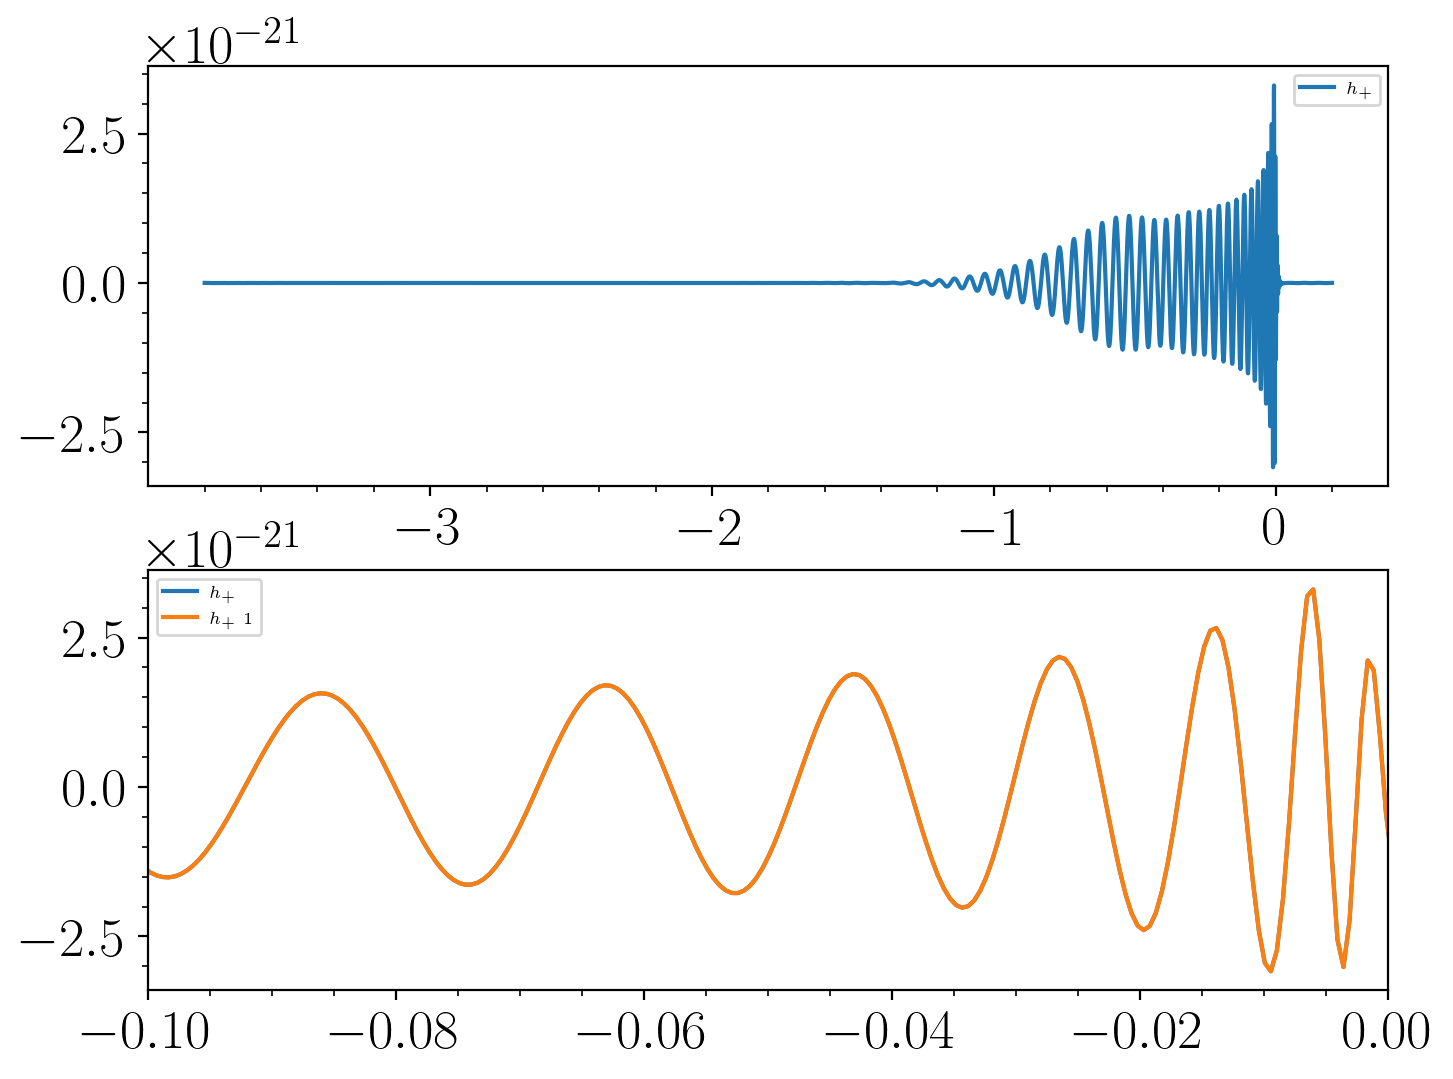

In [5]:
fig, axes = plt.subplots(2, 1, figsize=(8,6))
axes[0].plot(hp.sample_times, hp, label=r'$h_+$')
axes[0].minorticks_on()
axes[0].legend(loc='best', fontsize=6)

axes[1].plot(hp.sample_times, hp, label=r'$h_+$')
axes[1].minorticks_on()
axes[1].set_xlim(-0.1,0)
axes[1].legend(loc='best', fontsize=6)

axes[1].plot(hp1.sample_times, hp1, label=r'$h_+$ 1')
axes[1].minorticks_on()
axes[1].set_xlim(-0.1,0)
axes[1].legend(loc='best', fontsize=6)


In [6]:
# choosing detector
ifos = ['H1', 'L1']
# parameters for the projection
sky_params = {
    'ra':2.2,
    'dec':-1.25,
    'polarization':1.75
}

signal = {'H1':0,'L1':0}
for ifo in ifos:
    signal[ifo] = Detector(ifo).project_wave(hp, 
                                hc,  
                                **sky_params)

In [7]:
hp.start_time

LIGOTimeGPS(-3, -800000000)

In [8]:
hp.end_time

LIGOTimeGPS(0, 200000000)

In [9]:
hp.duration

4.0

Text(0.5, 1.0, 'Detector response to incident GW in H1 and L1')

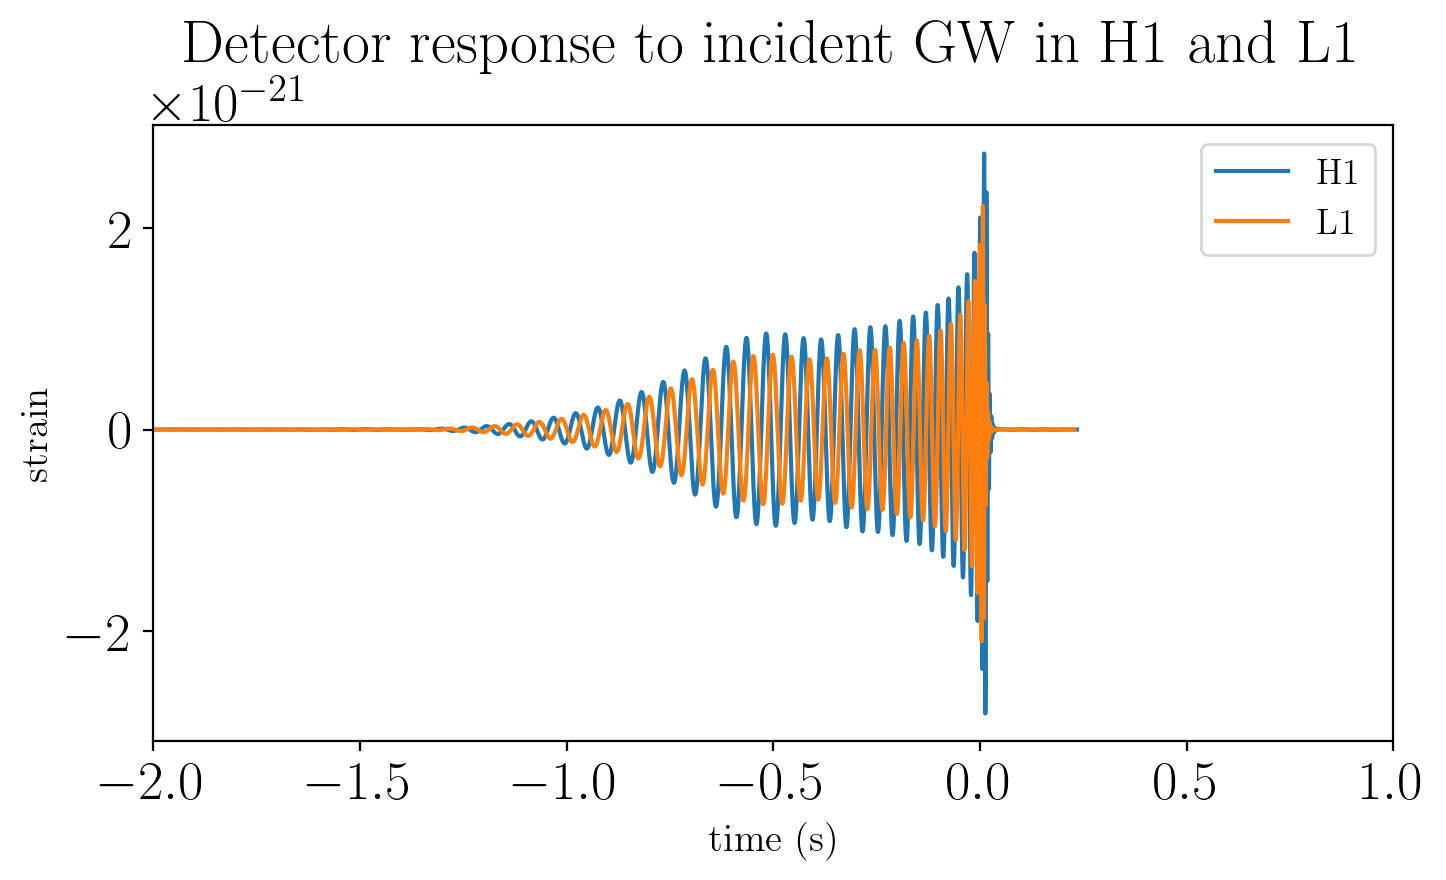

In [10]:
plt.figure(figsize=(8,4))
for ifo in ifos:
    plt.plot(signal[ifo].sample_times, signal[ifo], label=ifo)
plt.xlabel('time (s)', fontsize=14)
plt.ylabel('strain', fontsize=14)
plt.legend(loc='best')
plt.xlim(-2,1)
plt.title("Detector response to incident GW in H1 and L1", fontsize=22)

In [11]:
len(signal[ifo].sample_times)

8259

In [12]:
hp_tilde, hc_tilde = get_fd_waveform(**align_pars)
hp_tilde1, hc_tilde1 = get_fd_waveform(**align_pars2)

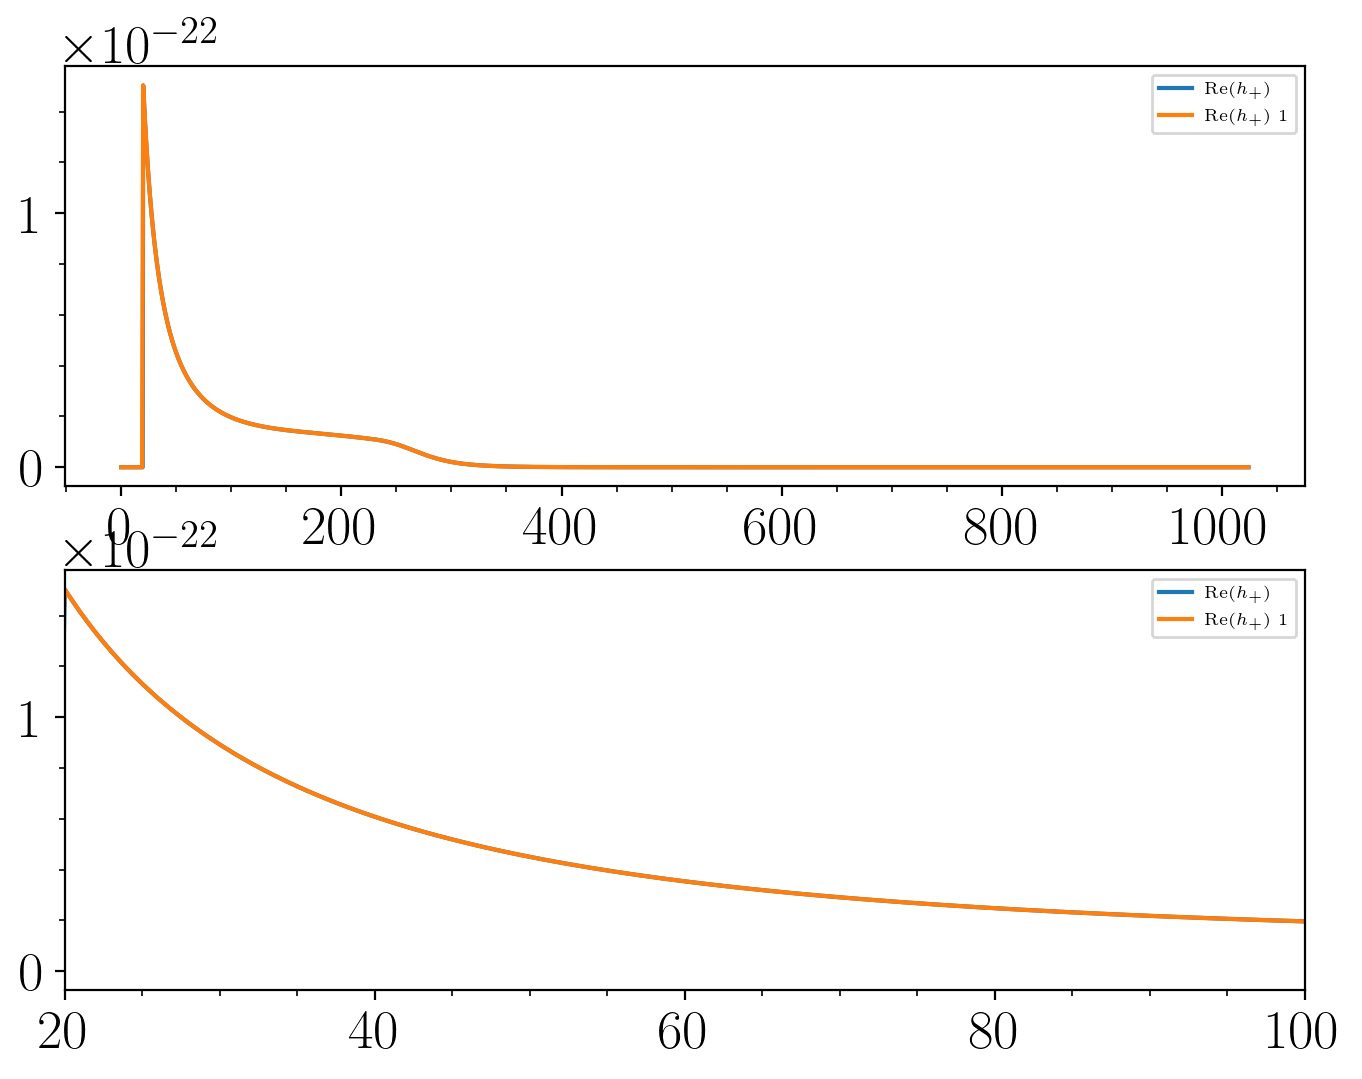

In [13]:
fig, axes = plt.subplots(2, 1, figsize=(8,6))
axes[0].plot(hp_tilde.sample_frequencies, abs(hp_tilde), label=r'Re($h_+$)')
axes[0].plot(hp_tilde1.sample_frequencies, abs(hp_tilde1), label=r'Re($h_+$) 1')
axes[0].minorticks_on()
axes[0].legend(loc='best', fontsize=6)

axes[1].plot(hp_tilde.sample_frequencies, abs(hp_tilde), label=r'Re($h_+$)')
axes[1].plot(hp_tilde1.sample_frequencies, abs(hp_tilde1), label=r'Re($h_+$) 1')
axes[1].minorticks_on()
axes[1].set_xlim(20,100)
axes[1].legend(loc='best', fontsize=6)


In [14]:
th_signal = hp_tilde.to_timeseries()
th_signal1 = hp_tilde1.to_timeseries()

In [15]:
print(th_signal.duration)
print(th_signal1.duration)

2.0
1.0


In [16]:
print(len(th_signal))
print(len(th_signal1))

4096
2048


(-2.0, 1.0)

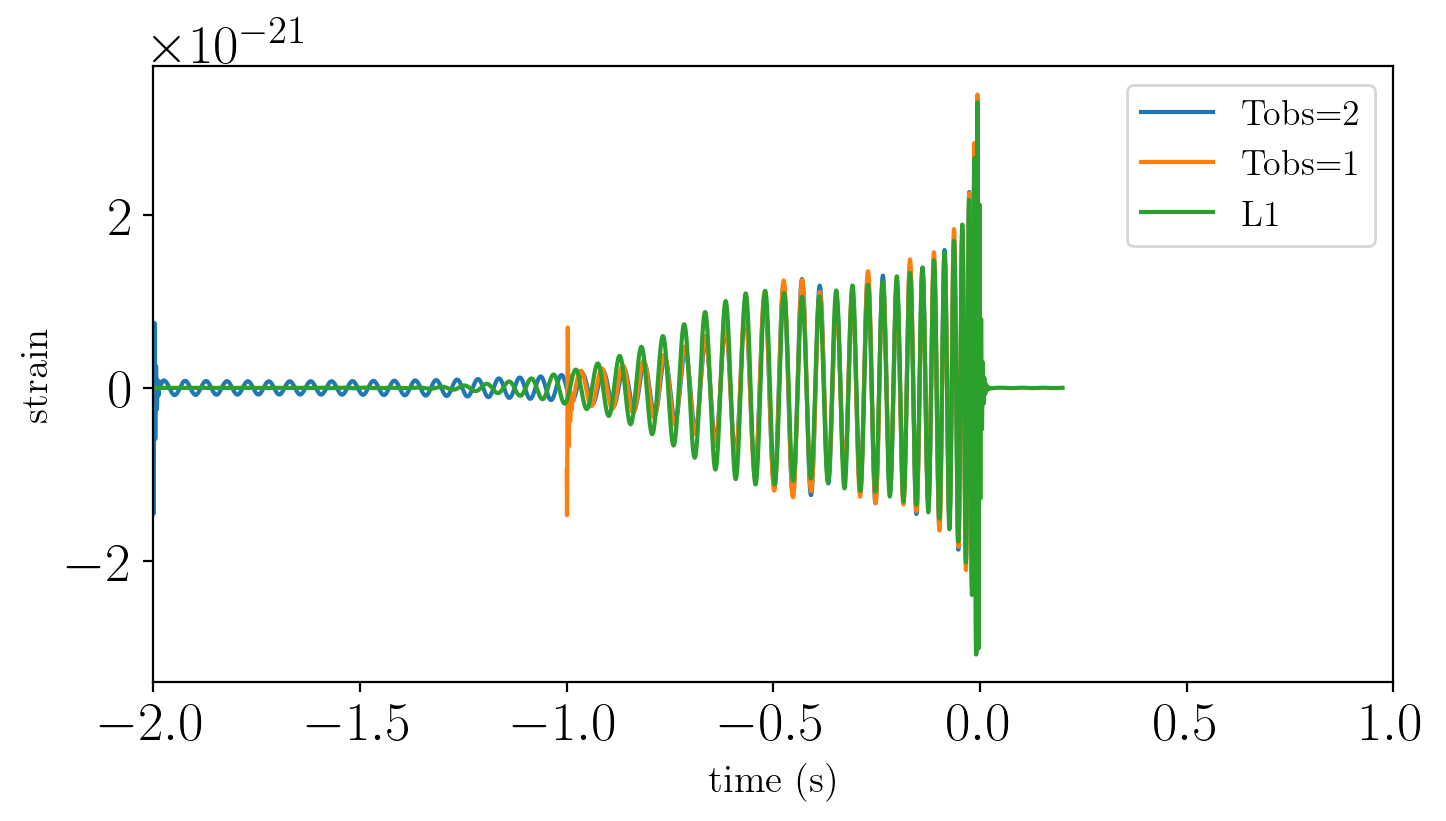

In [17]:
plt.figure(figsize=(8,4))
plt.plot(th_signal.sample_times, th_signal, label='Tobs=2')
plt.plot(th_signal1.sample_times, th_signal1, label='Tobs=1')
plt.plot(hp.sample_times, hp, label=ifo)
plt.xlabel('time (s)', fontsize=14)
plt.ylabel('strain', fontsize=14)
plt.legend(loc='best')
plt.xlim(-2,1)

Comparing ```tc```

In [18]:
# choosing detector
ifos = ['H1', 'L1']
# parameters for the projection
sky_params = {
    'ra':2.2,
    'dec':-1.25,
    'polarization':1.75
}
tc = 1126259462

hp1.start_time += tc
hc1.start_time += tc

signal1 = {'H1':0,'L1':0}
for ifo in ifos:
    signal1[ifo] = Detector(ifo).project_wave(hp1, 
                                hc1,
                                reference_time=tc,
                                method='lal',
                                **sky_params)

Text(0.5, 1.0, 'Detector response to incident GW in H1 and L1')

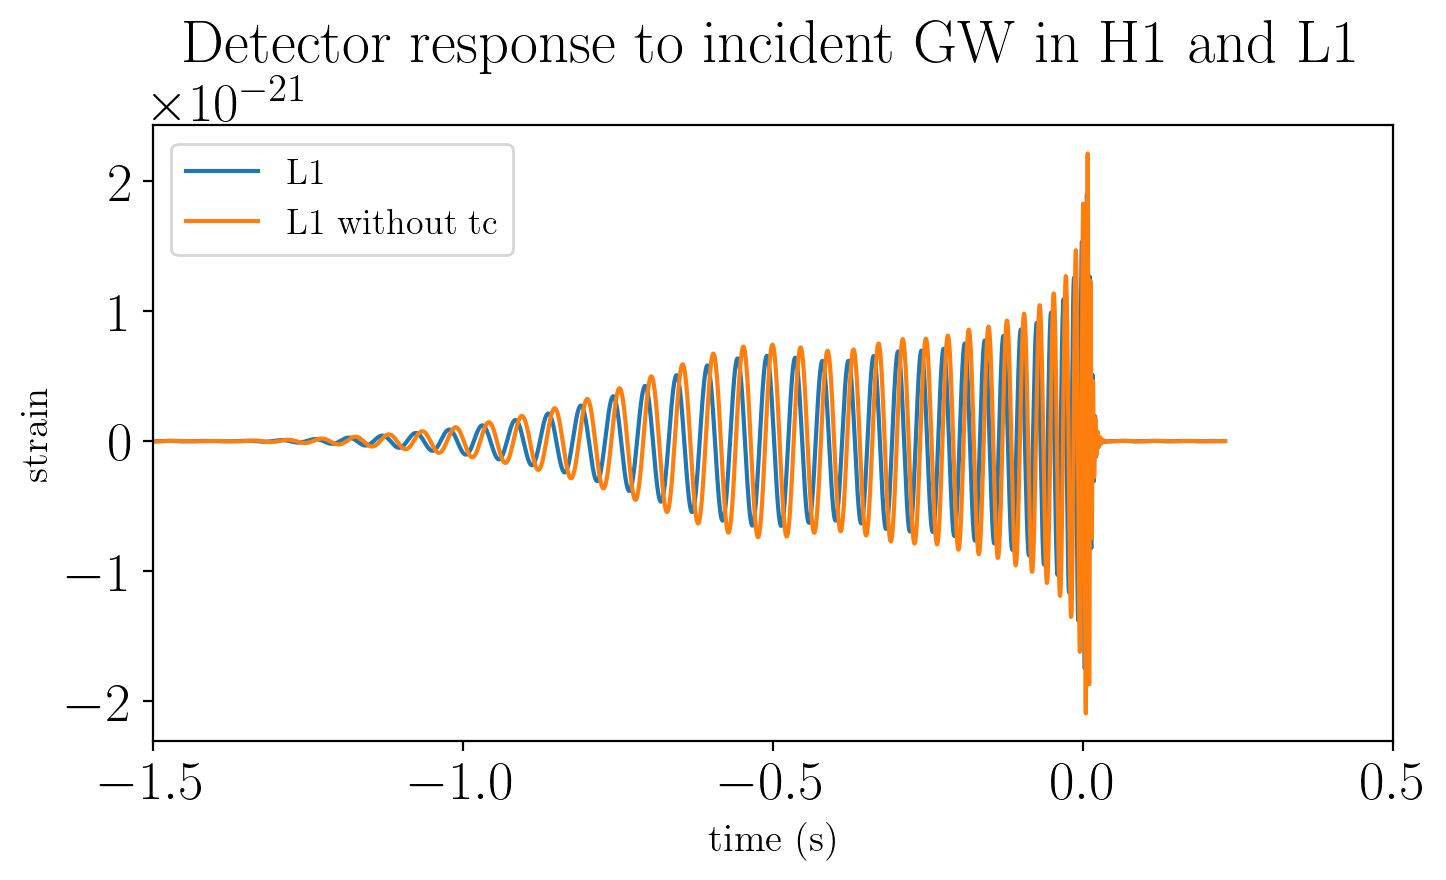

In [19]:
plt.figure(figsize=(8,4))
plt.plot(signal[ifo].sample_times, signal1[ifo], label=ifo)
plt.plot(signal[ifo].sample_times, signal[ifo], label=ifo+' without tc')
plt.xlabel('time (s)', fontsize=14)
plt.ylabel('strain', fontsize=14)
plt.legend(loc='best')
plt.xlim(-1.5,0.5)
plt.title("Detector response to incident GW in H1 and L1", fontsize=22)

In [20]:
# crop waveforms to 1.50s total duration with tc at 1s
cropped = signal1[ifo].time_slice(tc - 1.35, tc + 0.15, mode='nearest')


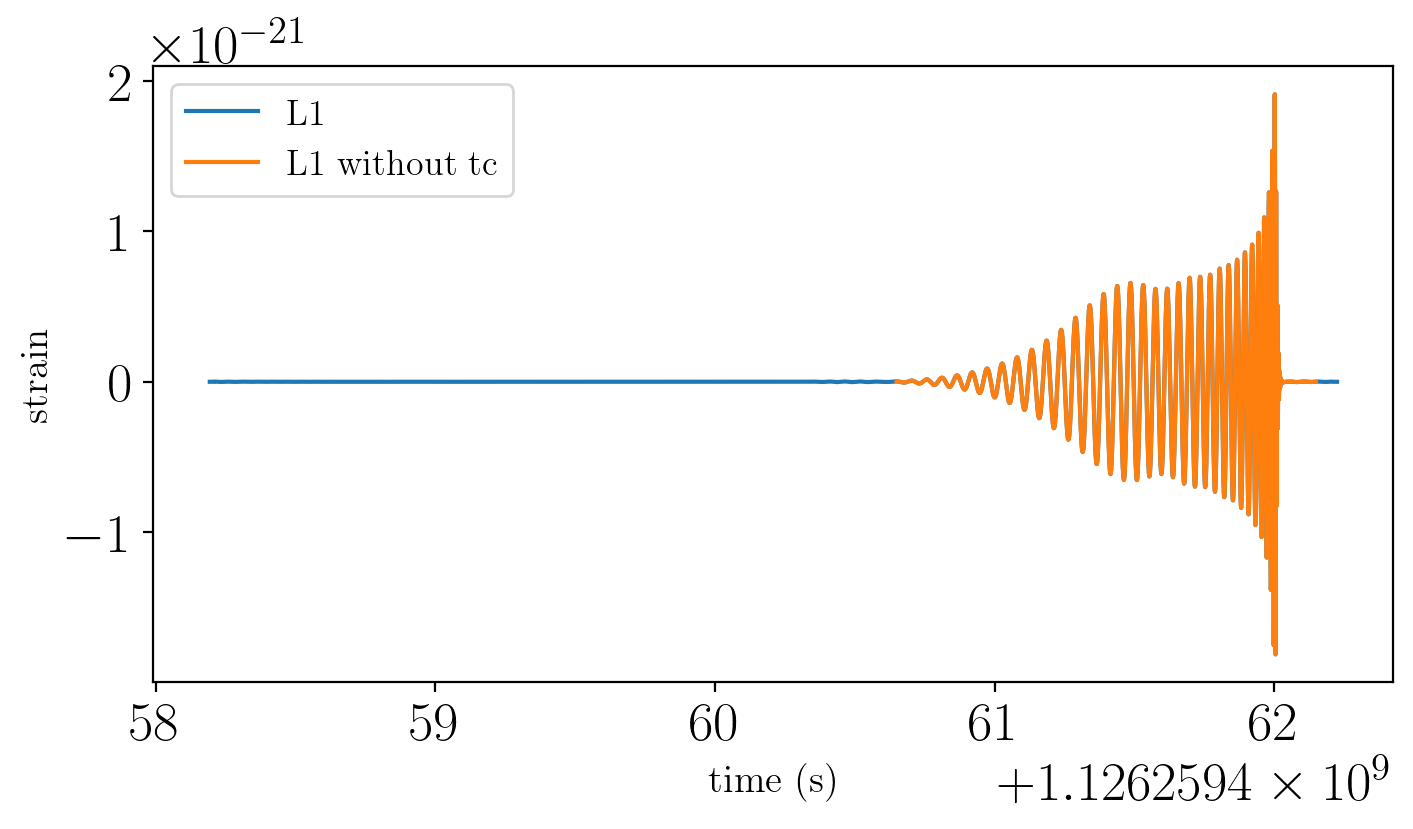

In [21]:
plt.figure(figsize=(8,4))
plt.plot(signal1[ifo].sample_times, signal1[ifo], label=ifo)
plt.plot(cropped.sample_times, cropped, label=ifo+' without tc')
plt.xlabel('time (s)', fontsize=14)
plt.ylabel('strain', fontsize=14)
plt.legend(loc='best')

In [22]:
len(cropped.sample_times)

3072

Now we can generate Gaussian noise and then make the injection. But in future examples, this step is not required because we will use real data.

In [23]:
### Generate Gaussian noise
import pycbc.psd
import pycbc.noise

# Choose the frequency step to be compatible with the signal duration
delta_f = 1.0 / cropped.duration

# Calculate the Nyquist frequency
f_Nyquist = sampling_rate/2.0

# Calculate the number of frequency bins
flen = int(f_Nyquist/delta_f) + 1

psd_aLIGO = pycbc.psd.aLIGOZeroDetHighPower(flen, delta_f, 20)

# choose duration in seconds
noise_duration = cropped.duration

# time step
delta_t = 1.0 / sampling_rate

# number of samples
tsamples = int(noise_duration / delta_t)

# noise time series
ts_aLIGO = pycbc.noise.noise_from_psd(tsamples, delta_t, psd_aLIGO, seed=127)



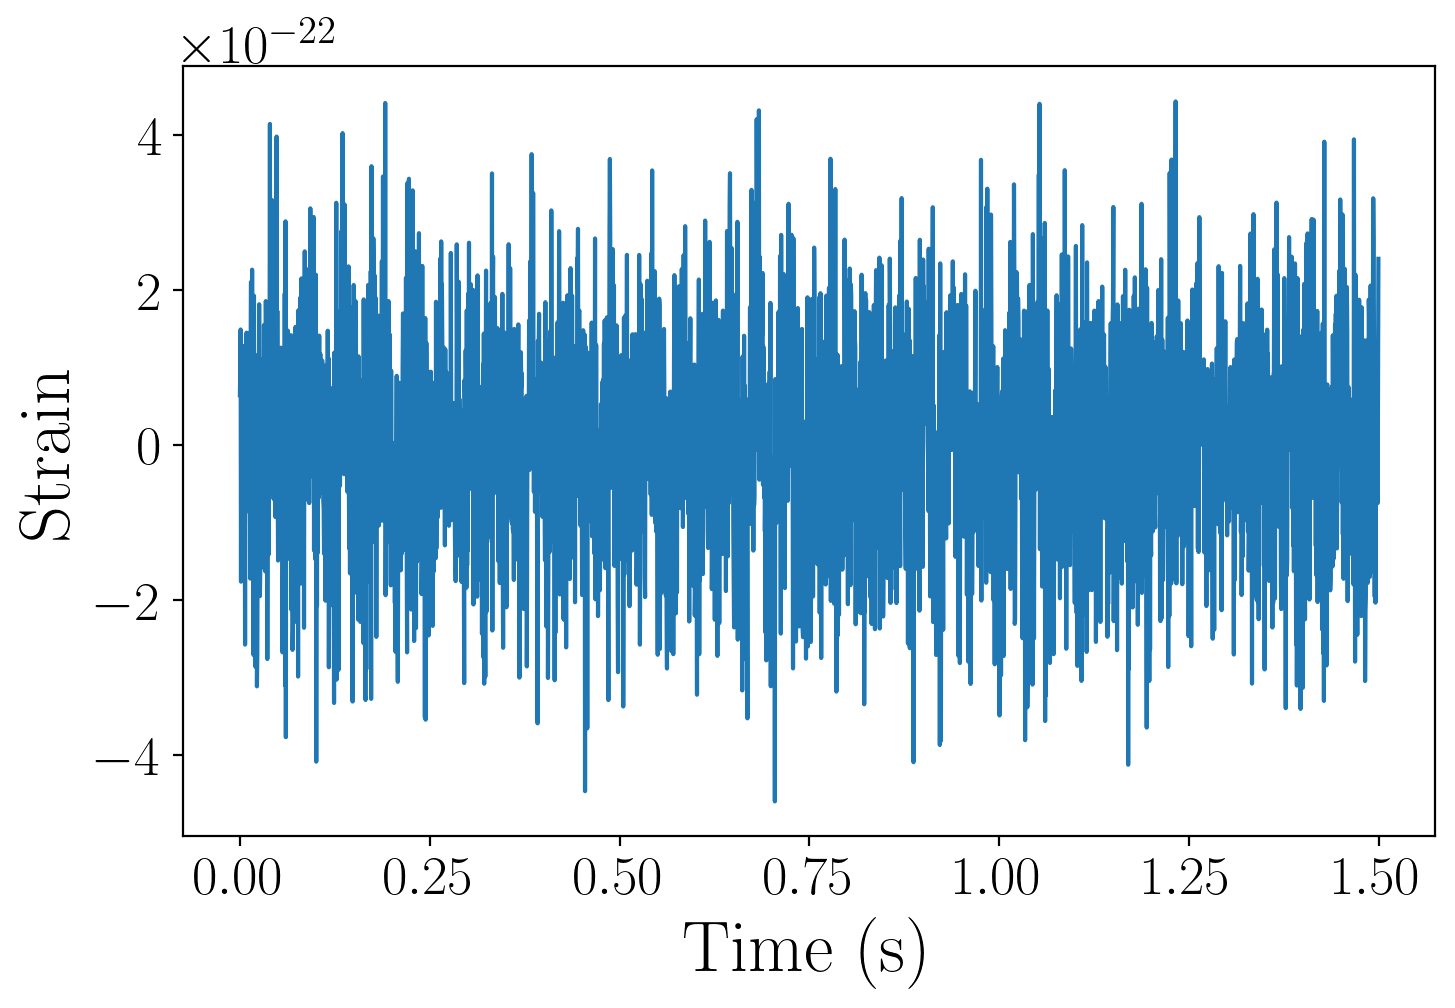

In [24]:
plt.plot(ts_aLIGO.sample_times, ts_aLIGO)
plt.ylabel('Strain')
plt.xlabel('Time (s)')
plt.show()


In [25]:
# Estimate the PSD of the Gaussian noise

# Set number of time samples in each segment
segment_length = int(1 / delta_t)       # 1s segments

# Set segment stride
segment_stride = int(segment_length / 2)    # 50% overlap

psd_aLIGO_Gaussian = pycbc.psd.welch(ts_aLIGO, seg_len = segment_length, seg_stride = segment_stride)

### Generate Gaussian noise
ts_aLIGO_injected = pycbc.noise.noise_from_psd(tsamples, delta_t, psd_aLIGO, seed=127)

ts_aLIGO_injected.start_time += cropped.sample_times[0]  # shift noise start time to that of signal 

# inject signal into noise segment 
ts_aLIGO_injected += cropped

In [26]:
# data in FD
htilde_colored = ts_aLIGO_injected.to_frequencyseries() #make_frequency_series(ts_aLIGO_injected)

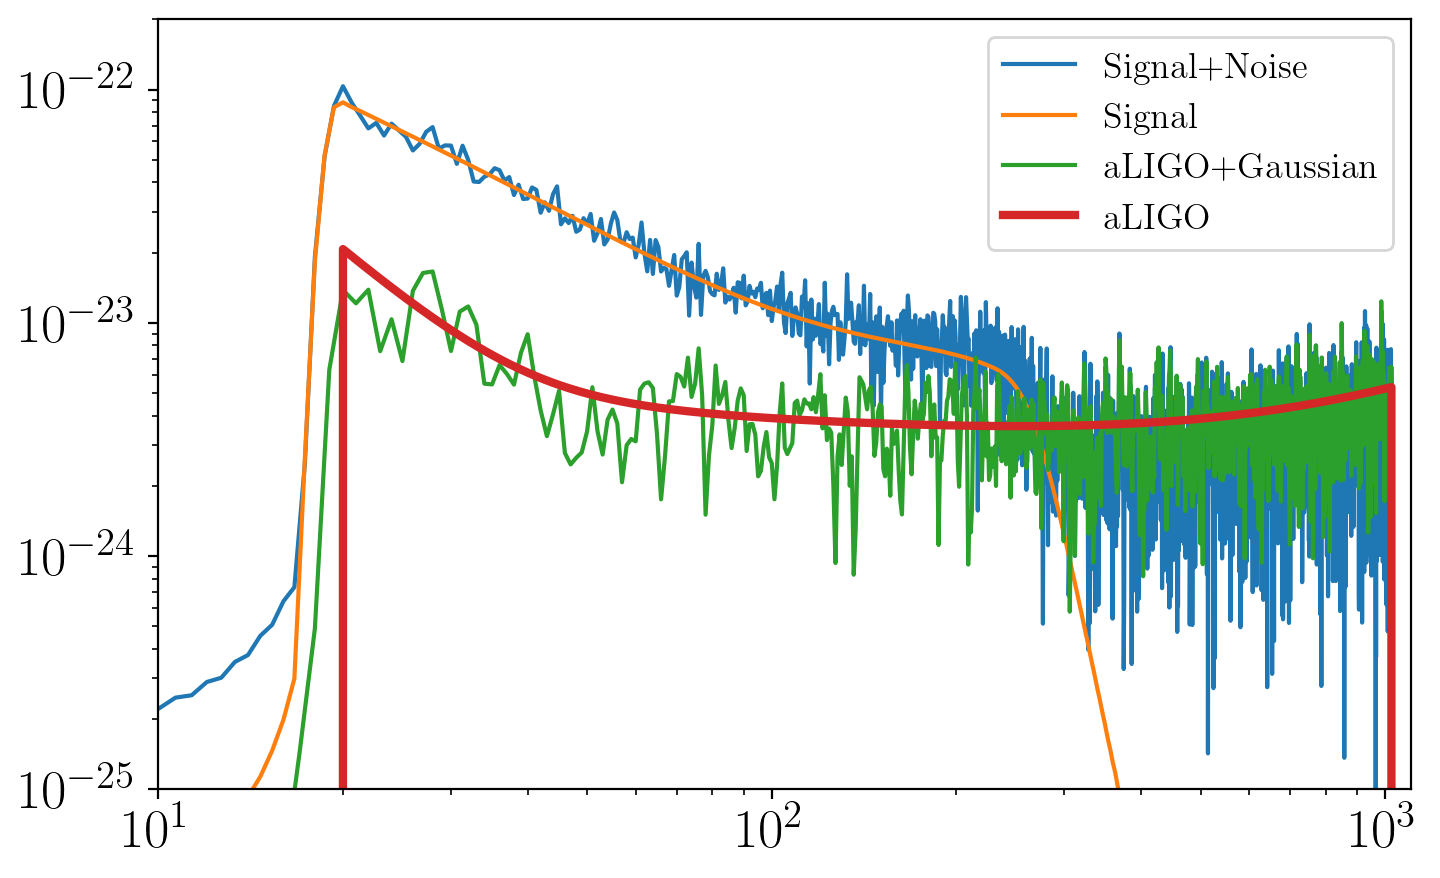

In [27]:
plt.loglog(htilde_colored.sample_frequencies, abs(htilde_colored), label='Signal+Noise')
plt.loglog(cropped.to_frequencyseries().sample_frequencies, abs(cropped.to_frequencyseries()), label='Signal')
plt.loglog(psd_aLIGO_Gaussian.sample_frequencies, np.sqrt(psd_aLIGO_Gaussian), label='aLIGO+Gaussian')
plt.loglog(psd_aLIGO.sample_frequencies, np.sqrt(psd_aLIGO), linewidth=3, label='aLIGO')
plt.xlim(xmin=10, xmax=1100)
plt.ylim(1e-25, 2e-22)
plt.legend()

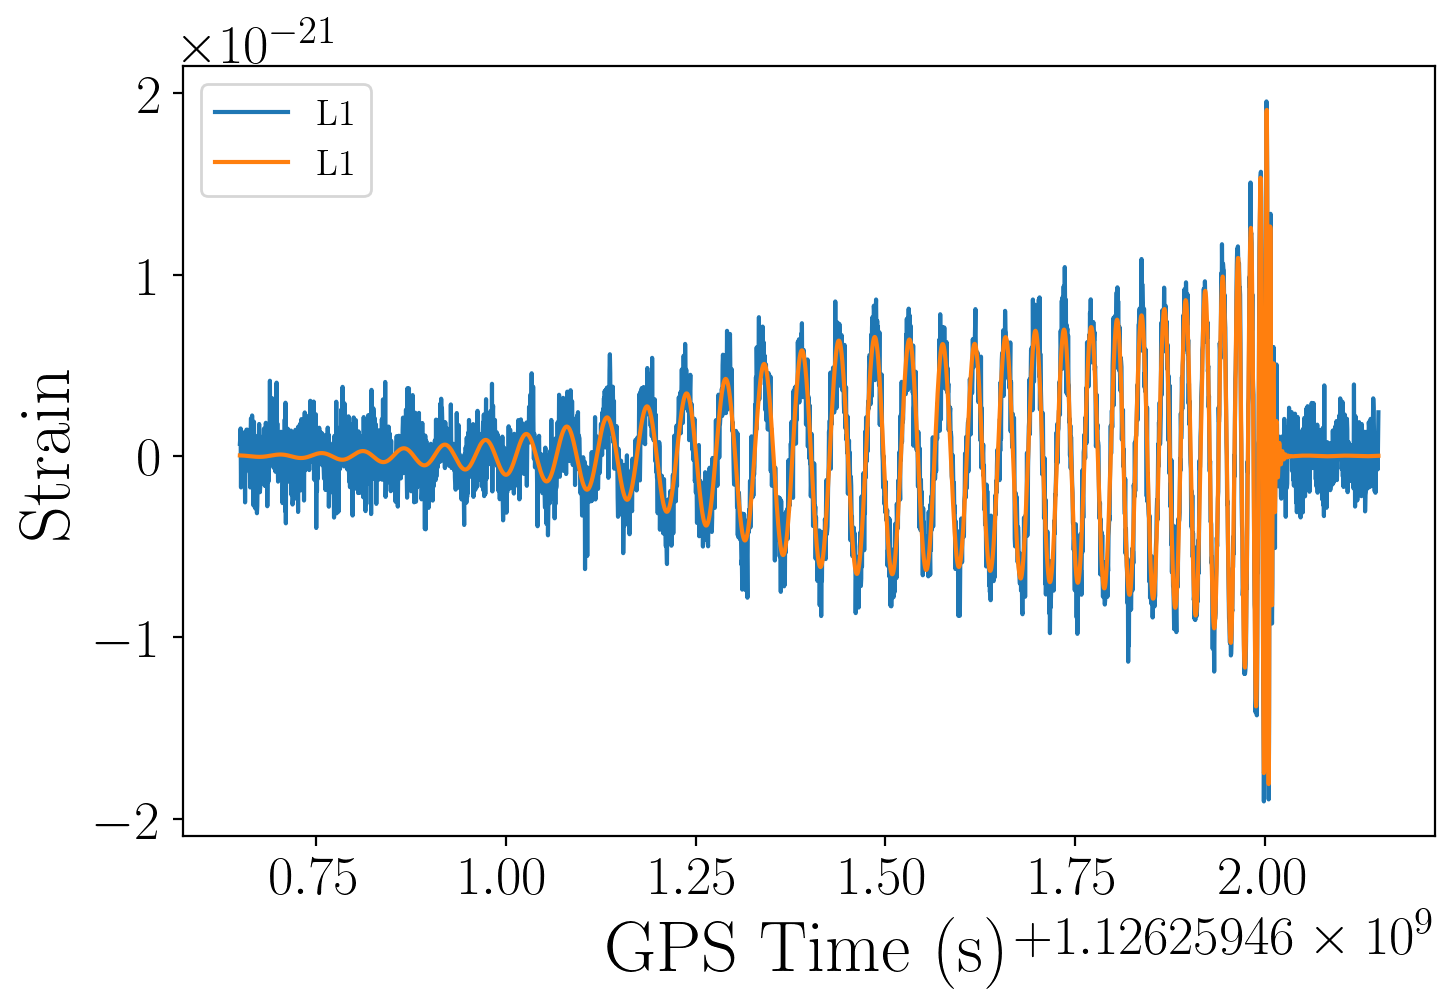

In [28]:
# Plot to see the injection
plt.plot(ts_aLIGO_injected.sample_times, ts_aLIGO_injected, label='L1')
plt.plot(cropped.sample_times, cropped, label='L1')
plt.ylabel('Strain')
plt.xlabel('GPS Time (s)')
plt.legend()
plt.show()

In [29]:
len(htilde_colored.sample_frequencies)

1537